# Ansambelõpe (*ensemble learning*)


## Sisukord

* [Juhuslik mets](#rnd_forest)
* [Ülesanne 8.1](#8_1)
* [Ansambliõppe teooria](#ensemble)
* [Bagging](#bagging)
* [AdaBoost](#AdaBoost)
* [Ülesanne 8.2](#8_2)

Põhineb S.Raschka *Python Machine Learnig* raamatu [peatükil 7](https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch07) ([*MIT litsents*](https://github.com/rasbt/python-machine-learning-book/blob/master/LICENSE.txt)).

<a id='rnd_forest'></a>
## Juhuslik mets (*random forest*)

Moodul [sklearn.ensemble](https://scikit-learn.org/stable/modules/ensemble.html#ensemble) pakub erinevaid ansambelõppe meetodeid.

[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
tekitab otsustuspuude metsa, kus otsustuspuude erinevuse saavutamiseks treenitakse neid erinevate andmevalimitega. Ansambelõppega seotud argumendid on:

* `n_estimators`: Puude arv metsas. Vaikimisi 100.
* `bootstrap`: True / False. Kas kasutada treeninguks alamandmestikku või kõiki andmeid? Vaikimisi True (alamandmestik).


In [25]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np


# Sklearn näiteandmestiku süntaks (tüüpi Bunch). 
# Ei tööta .csv failidega, pandas DataFrame'idega jne.
wine_bunch = load_wine()
X = wine_bunch.data 
y = wine_bunch.target
columns = wine_bunch.feature_names 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

brf_pipe = Pipeline([('sc1', StandardScaler()),
                     ('mets', RandomForestClassifier(n_estimators=100))])
rf_pipe = Pipeline([('sc1', StandardScaler()),
                     ('salu', RandomForestClassifier(n_estimators=10))])
dt_pipe = Pipeline([('sc1', StandardScaler()),
                    ('puu', DecisionTreeClassifier())])

for pipe in [dt_pipe, rf_pipe, brf_pipe]:
    # Treenime mudeli
    pipe.fit(X_train, y_train)
    print("\nKonveieri sammud:", pipe.named_steps.keys())
    
    # Hindame mudeli headust
    scores = cross_val_score(estimator=pipe,
                             X=X_train,
                             y=y_train,
                             cv=10)
    print('CV keskmine täpsus treeningandmetel: %.3f' % np.mean(scores), 
          "+/- %.3f" % np.std(scores))
    print("Täpsus testandmetel:", pipe.score(X_test, y_test))
    print("Eksimismaatriks testandmetel:\n", confusion_matrix(y_test, 
                                                            pipe.predict(X_test)))

print("Juhusliku metsa attr tähtsused:")
fi = brf_pipe.named_steps["mets"].feature_importances_
for i, f in sorted(zip(fi, columns), reverse=True):
    print(f, i)
 


Konveieri sammud: dict_keys(['sc1', 'puu'])
CV keskmine täpsus treeningandmetel: 0.857 +/- 0.124
Täpsus testandmetel: 0.9333333333333333
Eksimismaatriks testandmetel:
 [[12  0  0]
 [ 0 15  1]
 [ 2  0 15]]

Konveieri sammud: dict_keys(['sc1', 'salu'])
CV keskmine täpsus treeningandmetel: 0.977 +/- 0.034
Täpsus testandmetel: 1.0
Eksimismaatriks testandmetel:
 [[12  0  0]
 [ 0 16  0]
 [ 0  0 17]]

Konveieri sammud: dict_keys(['sc1', 'mets'])
CV keskmine täpsus treeningandmetel: 0.977 +/- 0.034
Täpsus testandmetel: 1.0
Eksimismaatriks testandmetel:
 [[12  0  0]
 [ 0 16  0]
 [ 0  0 17]]
Juhusliku metsa attr tähtsused:
flavanoids 0.1889870803386286
alcohol 0.16281931061337762
proline 0.13129275608768654
od280/od315_of_diluted_wines 0.12861860860286684
color_intensity 0.12571100808446467
hue 0.0671183477771465
total_phenols 0.06495657998081092
magnesium 0.034699813511477794
alcalinity_of_ash 0.030784665500632174
proanthocyanins 0.027918286640108158
malic_acid 0.02144129791557736
ash 0.011421

<a id='8_1'></a>
## Ülesanne 8.1

Laadige alla ülesandes 4.1 vaadeldud [loomaaia andmestik](http://archive.ics.uci.edu/ml/machine-learning-databases/zoo/). Võtke seekord veerg predator ennustatavaks klassiks Y. Looge andmetabel X, millest on eemaldatud klassile vastav veerg predator ja mittearvulised veerud animal_name (juhul kui pole indeks) ja type.
* Jagage andmed treening- ja testandmeteks
* Looge konveier (Pipeline), mis koosneb [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) normaliseerijast ja [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) ansambel-klassifikaatorist 100 puu jaoks. 
* Treenida konveier treeningandmetel, leida selle ristkontrolli täpsuse keskmine ja standardhälve treeningandmetel ja täpsus testandmetel. 
* Leida ja väljastada eksimismaatriks. 
* Leida ja väljastada atribuutide tähtsused (`.feature_importances_`) juhuslikus metsas.

In [27]:
# Andmete laadimine
import pandas as pd
zoo_df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data", 
                     header=None, index_col=0,
                     names=["animal_name", "hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator", "toothed", "backbone", "breathes", "venomous", "fins", "legs", "tail", "domestic", "catsize", "type" ])
zoo_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
animal_name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

zoo_target = zoo_df.pop('predator')
zoo_df.pop('type')

X_train, X_test, y_train, y_test = train_test_split(zoo_df, 
                                                    zoo_target, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [29]:
pipe_norm_rnd_forest = Pipeline([('norm', MinMaxScaler()),
                                 ('rnd_forest', RandomForestClassifier(n_estimators=100))])

pipe_norm_rnd_forest.fit(X_train, y_train)
scores = cross_val_score(estimator=pipe_norm_rnd_forest,
                             X=X_train,
                             y=y_train,
                             cv=10)
print('CV keskmine täpsus treeningandmetel: %.3f' % np.mean(scores), "+/- %.3f" % np.std(scores))
print("Täpsus testandmetel:", pipe_norm_rnd_forest.score(X_test, y_test))

CV keskmine täpsus treeningandmetel: 0.662 +/- 0.177
Täpsus testandmetel: 0.5238095238095238


In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pipe_norm_rnd_forest.predict(X_test))

array([[4, 9],
       [1, 7]])

In [31]:
x = pipe_norm_rnd_forest.named_steps['rnd_forest'].feature_importances_
for i, f in sorted(zip(x, zoo_df.columns), reverse=True):
    print(f"{f:>30}  {i}")

                      airborne  0.1654244305825582
                          legs  0.13911057706023444
                      domestic  0.11630852559991076
                       aquatic  0.10473139254674807
                       catsize  0.09979432438757638
                      breathes  0.077471187217537
                          tail  0.05074690979490931
                       toothed  0.046568758596773535
                          hair  0.03943905298737301
                      venomous  0.03595996886451807
                      feathers  0.031055537049762424
                      backbone  0.027435856866118134
                          eggs  0.026958420440101022
                          milk  0.019638873560533322
                          fins  0.01935618444534645


<a id='ensemble'></a>
## Ansambelõppe teooria

Vaatame lihtsustatud juhtu kui meil on kaks võimalikku klassi ja $n$ klassifikaatorit. Eeldame lihtsustatult, et kõik klassifikaatorid ennustavad klassi 0 tõenäosusega p ja järelikult klassi 1 tõenäosusega 1-p ja klassifikaatorite ennustused ei sõltu üksteisest. Tõenäosusmõõt näitab kui suure tõenäosusega on klassi 0 ennustavate klassifikaatorite arv $x=k$ ja see on tõenäosusteooriast tuntud binoomjaotus.

$$ P(x=k) = \binom{n}{k} p^k (1-p)^{n-k}$$

 $\binom{n}{k} = C^k_n = \frac{n!}{k! (n-k)!}$ : kõigi võimalike $k$ elemendiliste alamhulkade arv $n$ elemendi hulgast. 

In [32]:
0.6**3 * 0.4**2

0.03456

In [33]:
import numpy as np
from scipy.special import comb
import math

#print(comb(5, 3))

# Defineerime tõnäosusmõõdu funktsiooni
def p_mass(n, k, p): return comb(n, k) * p**k * (1-p)**(n-k)



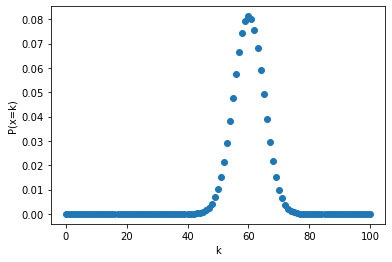

In [34]:
# Joonistame tõenäosusmõõdu graafiku juhu jaoks, kui meil on 10 klassifikaatorit st n=100 
# ja need ennustavad klassi 0 tõenäosusega 0.6


import matplotlib.pyplot as plt
%matplotlib inline

n = 100
p = 0.6
# Klassi 0 ennustavate klassifikaatorite arv
n_clf = np.arange(0, n+1)
probs = [p_mass(n, x, p) for x in n_clf]

plt.scatter(n_clf, probs)
plt.xlabel("k")
plt.ylabel("P(x=k)")
plt.show()

Eeldame, et kõik klassifikaatorid teevad vigase ennustuse tõenäosusega $\epsilon$ ja nende ennustused ei sõltu üksteisest. Ansambel ennustab teatud klassi kui vähemalt $y$ klassifikaatorit ($y$ on tavaliselt pool klassifikaatorite arvust) ennustavad seda klassi.  Kuidas sõltub ansambli vigase ennustuse tõenäosus klassifikaatori vea tõenäosusest $\epsilon$?

$$ P(x\geq y) = \sum_{k=y}^{n} P(x=k)$$

Selle saame võttes $P(x=k)$ valemis tõenäosuseks $p$ vea tõenäosuse $\epsilon$.

$$ P(x\geq y) = \sum_{k=y}^{n} \binom{n}{k} \epsilon^k (1-\epsilon)^{n-k}$$


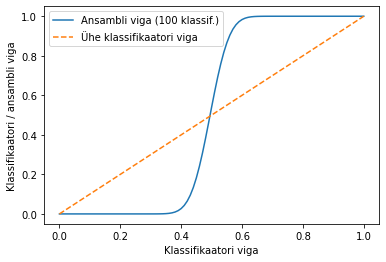

In [35]:
# Defineerime vastava funktsiooni

def ensemble_error(n, epsilon):
    y = math.ceil(n/2) # tavaline ennustuslävi, pooled klassifikaatorid, ümardada üles (ceil)
    return sum([p_mass(n, k, epsilon) for k in range(y, n+1)])
    

#print(ensemble_error(100, 0.5))
n=100
# Joonistame vastava graafiku
error_range = np.arange(0.0, 1.01, 0.01)
ens_errors = [ensemble_error(n, e) for e in error_range]

plt.plot(error_range, ens_errors, label="Ansambli viga (%i klassif.)" %n)
plt.plot(error_range, error_range, linestyle="--", label="Ühe klassifikaatori viga")
plt.xlabel("Klassifikaatori viga")
plt.ylabel("Klassifikaatori / ansambli viga")
plt.legend(loc='upper left')
plt.show()

Näeme, et juba juhul kui klassifikaatori viga on 0.4 või väiksem, on ansambelõppe abil võimalik tulemusi radikaalselt parandada. Tasub vaadata, mis juhtub kui klassifikaatorite arvu $n$ ansamblis   suurendada. Muidugi ei pruugi kõik eelnevad eeldused, nagu klassifikaatorite sõltumatus, praktikas kehtida.

<a id='bagging'></a>
## Bagging

Ansambelõppe klassifikaator [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) moodulist [sklearn.ensemble](https://scikit-learn.org/stable/modules/ensemble.html#ensemble) treenib etteantud  klassifikaatorit `base_estimator n_estimators` erineva alamvalimiga. Alamvalimid on tüüpiliselt leitud nn tagasipanekuga valiku (*sampling with replacement*) meetodil, mille korral sama algse valimi objekt võib esineda juhuvalimis mitu korda, sest valitud objekt pannakse juhuvalimisse "tagasi" ja võib uuesti valituks osutuda. Muud olulised argumendid:
* `bootstrap`: kas kasutada juhuvalimite genereerimiseks tagasipanekuga valikut. Vaikimisi True.
* `bootstrap_features`: kas valida lisaks objektidele ka alamhulk atribuutidest? Vaikimisi False.
* `max_samples`: juhuvalimi suurus võrreldes tervikvalimiga. Vaikimisi 1.0.
* `max_features`: juhuvalimi atribuutide arv võrreldes tervikvalimiga. Vaikimisi 1.0.

In [36]:
from sklearn.linear_model import Perceptron


clf_prp = Perceptron(max_iter=40)
clf_pipe_b = Pipeline([('sc1', StandardScaler()),
                       ('bc', BaggingClassifier(base_estimator=clf_prp,
                                                n_estimators=10,
                                                bootstrap_features=True))])

clf_pipe_b.fit(X_train, y_train)
scores = cross_val_score(estimator=clf_pipe_b,
                             X=X_train,
                             y=y_train,
                             cv=10)
print('CV keskmine täpsus treeningandmetel: %.3f' % np.mean(scores), 
      "+/- %.3f" % np.std(scores))
print("Täpsus testandmetel:", clf_pipe_b.score(X_test, y_test))

CV keskmine täpsus treeningandmetel: 0.613 +/- 0.131
Täpsus testandmetel: 0.7142857142857143


<a id='AdaBoost'></a>
## AdaBoost

[AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) ansambelõppe meetod moodulist [sklearn.ensemble](https://scikit-learn.org/stable/modules/ensemble.html#ensemble) hindab eelmisel treeningraundil valesti klassifitseeritud elemente uuel raundil kaalukamaks. Vaikimisi on õpetatavateks klassifikaatoriteks `base_estimator` otsustuspuu "kännud": `DecisionTreeClassifier(max_depth=1)`.



In [37]:
clf_pipe_ab = Pipeline([('sc1', StandardScaler()),
                       ('ab', AdaBoostClassifier(n_estimators=10))])

clf_pipe_ab.fit(X_train, y_train)
scores = cross_val_score(estimator=clf_pipe_ab,
                             X=X_train,
                             y=y_train,
                             cv=10)
print('CV keskmine täpsus treeningandmetel: %.3f' % np.mean(scores), 
      "+/- %.3f" % np.std(scores))
print("Täpsus testandmetel:", clf_pipe_ab.score(X_test, y_test))

CV keskmine täpsus treeningandmetel: 0.675 +/- 0.115
Täpsus testandmetel: 0.5714285714285714


AdaBoost annab suurema kaalu eelnevates iteratsioonides valesti klassifitseeritud objektide õigesti/valesti ennustamisele. Järgneval pildil illustreerib kaalu ringi/kolmnurga suurus ja otsustuspuu kännu ennustusläve  punktiirjoon.

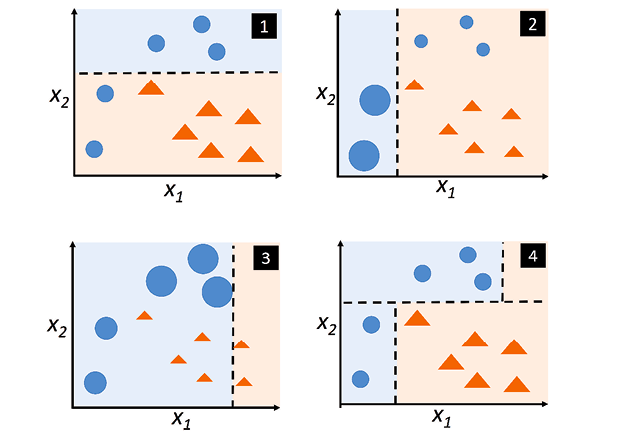

In [38]:
from IPython.display import Image
Image("https://vitalflux.com/wp-content/uploads/2020/09/Screenshot-2020-09-09-at-8.17.33-AM.png")


AdaBoosti klassifikaatori hinnang on:
$$F_T(x) = \sum_{t=1}^T f_t(x)$$
* $T$ on klassifikaatorite arv ansamblis
* $x$ on objekt (vektor)
* $t$ on iteratsioon
* $f_t(x)$ on komponentklassifikaatori koguhinnang $ f_t(x) = \alpha_t h(x)$, kus $\alpha_t$ on teatud koefitsent iteratsiooni $t$ jaoks ja $h(x)$ on vastava klassifikaatori ennustus.


Koefitsent $\alpha_t$ ja klassifikaator leitakse iteratsiooni jaoks nii, et minimeerida summaarset treeningviga:

$$ E_t = \sum_i E(F_{t-1}(x_i) + \alpha_t h(x_i)) $$
, kus $E()$ on teatud veafunktsioon.

Objekti $i$ kaal iteratsiooni $t$ jaoks on 
$$ w_{it} = E (F_{t-1}(x_i)) $$

# Ekstra juhuslik mets

Klass [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier) kasutab metsa puude genereerimiseks lisaks juhuslikele treeningandmetele ka juhuslike lävendite genereerimist igale atribuudile (tavaliselt genereerib algoritm kõige paremini eraldava lävendi).

In [39]:
from sklearn.ensemble import ExtraTreesClassifier

clf_pipe = Pipeline([('sc1', StandardScaler()),
                     ('et', ExtraTreesClassifier(n_estimators=10))])

clf_pipe.fit(X_train, y_train)
#print("Attr tähtsused:", clf_pipe.named_steps["et"].feature_importances_)
scores = cross_val_score(estimator=clf_pipe,
                             X=X_train,
                             y=y_train,
                             cv=10)
print('CV keskmine täpsus treeningandmetel: %.3f' % np.mean(scores), 
      "+/- %.3f" % np.std(scores))
print("Täpsus testandmetel:", clf_pipe.score(X_test, y_test))

CV keskmine täpsus treeningandmetel: 0.662 +/- 0.194
Täpsus testandmetel: 0.6190476190476191


# 8x8 ruudustikku käsitsi kirjutatud numbrite liigitamise näide

In [40]:
from sklearn.datasets import load_digits
import pandas as pd

digit_bunch = load_digits()

X_d, y_d = digit_bunch.data, digit_bunch.target

pd.DataFrame(X_d).describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


<AxesSubplot:ylabel='Frequency'>

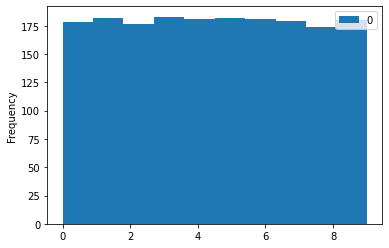

In [41]:
pd.DataFrame(y_d).plot.hist()

Võrdleme pertseptronit , selle bagging ansamblit, üksikut otsustuspuud ja erinevaid metsasid.

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

prcpt = Perceptron(max_iter=50)
dt = DecisionTreeClassifier(max_depth=5) #max_depth=1 on AdaBoosti standard
#lr = LogisticRegression(max_iter=10)

classifiers = [prcpt,
               AdaBoostClassifier(base_estimator=dt, n_estimators=50),
               BaggingClassifier(base_estimator=prcpt, n_estimators=50, bootstrap_features=True),
               dt,
               BaggingClassifier(base_estimator=dt, n_estimators=50, bootstrap_features=True),
               RandomForestClassifier(n_estimators=50),
               ExtraTreesClassifier(n_estimators=50)]

for clf in classifiers:
    scores = cross_val_score(estimator=clf, X=X_d, y=y_d, cv=10)
    print("%s \t %.2f +/- %.2f" % (type(clf).__name__, np.mean(scores), np.std(scores)))

Perceptron 	 0.91 +/- 0.03
AdaBoostClassifier 	 0.91 +/- 0.04
BaggingClassifier 	 0.93 +/- 0.04
DecisionTreeClassifier 	 0.64 +/- 0.04
BaggingClassifier 	 0.89 +/- 0.05
RandomForestClassifier 	 0.95 +/- 0.03
ExtraTreesClassifier 	 0.96 +/- 0.02


<a id='8_2'></a>
## Ülesanne 8.2

Treenige [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) koos [LogisticRegression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) baasklassifikaatoritega ja [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) ansambel-klassifikaatorid ülesandes 8.1 vaadeldud andmestikul.
* Leidke neile ristkontrolli täpsused treeningandmetel ja täpsused testandmetel. 
* Leida ja väljastada eksimismaatriksid. 
* Võrrelge täpsuseid omavahel ja ülesande 8.1 tulemusega. Milline ansambelõppe meetod on täpseim?

In [43]:
lr = LogisticRegression(max_iter=1000)

bagging = BaggingClassifier(base_estimator=lr, n_estimators=50, bootstrap_features=True)
ada_boost = AdaBoostClassifier(n_estimators=50)

norm_zoo_df = pd.DataFrame(StandardScaler().fit_transform(zoo_df), columns=zoo_df.columns)


X_train, X_test, y_train, y_test = train_test_split(norm_zoo_df, 
                                                    zoo_target, 
                                                    test_size=0.2, 
                                                    random_state=1)

classifiers = { 'bagging': bagging, 'ada_boost': ada_boost }
for name, clf in classifiers.items():
    print(f"{'='*10}{name:^10}{'='*10}")
    clf.fit(X_train, y_train)
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10)
    test_scores = clf.score(X_test, y_test)
    print(f"Train: {round(np.mean(scores), 2)} +/- {round(np.std(scores), 2)}")
    print(f" Test: {round(np.mean(test_scores), 2)}")
    print(f"Confusion matrix \n {confusion_matrix(y_test, clf.predict(X_test))}")
    


========== bagging  ==========
Train: 0.65 +/- 0.13
 Test: 0.57
Confusion matrix 
 [[8 5]
 [4 4]]
==========ada_boost ==========
Train: 0.65 +/- 0.15
 Test: 0.67
Confusion matrix 
 [[8 5]
 [2 6]]
